In [3]:
import matplotlib.pyplot as plt
import pandas as pd

## User Input
Change the inputs below
- `csv_path`: The path to where `progress.csv` is stored

In [87]:
csv_path = "logs/Rylan/masked_ppo_2_v2-2/progress.csv" 

## Plotting
Use the below graphs to see if training went well, can refer to notes on healthy behavior and warning signs

In [88]:
df = pd.read_csv(csv_path)
df.head()

,time/time_elapsed,rollout/ep_len_mean,time/total_timesteps,time/iterations,rollout/ep_rew_mean,time/fps,train/loss,train/learning_rate,train/clip_range,train/entropy_loss,train/policy_gradient_loss,train/approx_kl,train/value_loss,train/clip_fraction,train/n_updates,train/explained_variance
0,1,248.625000,2048,1,-31.187625,1100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,253.750000,4096,2,-27.910250,935,2.409614,0.0003,0.2,-1.113935,-0.009881,0.007035,15.982321,0.090771,10.0,0.014717
2,6,256.086957,6144,3,-30.405522,879,0.955525,0.0003,0.2,-1.077978,-0.005397,0.006601,2.618710,0.077881,20.0,0.911845
3,9,254.218750,8192,4,-27.848219,852,0.503245,0.0003,0.2,-1.104693,-0.011103,0.011615,3.564585,0.107617,30.0,0.915659
4,12,253.800000,10240,5,-29.166800,835,0.294748,0.0003,0.2,-1.103395,-0.002099,0.005028,1.067319,0.083838,40.0,0.900380


#### Mean Episode Reward & Episode Length Over Time
✅ Healthy Behavior:
- Reward increases gradually and plateaus — suggests the agent is improving, then stabilizing.
- Episode Length may decrease (if the agent is becoming more efficient) or stabilize at a logical average — Dominion is variable-length, so some fluctuation is fine.

⚠️ Warning Signs:
- Flat reward near zero, agent isn’t learning.
- Reward spikes then crashes, unstable training or overfitting.
- Episode length increases dramatically, could mean indecision or repetitive loops (like invalid action loops).

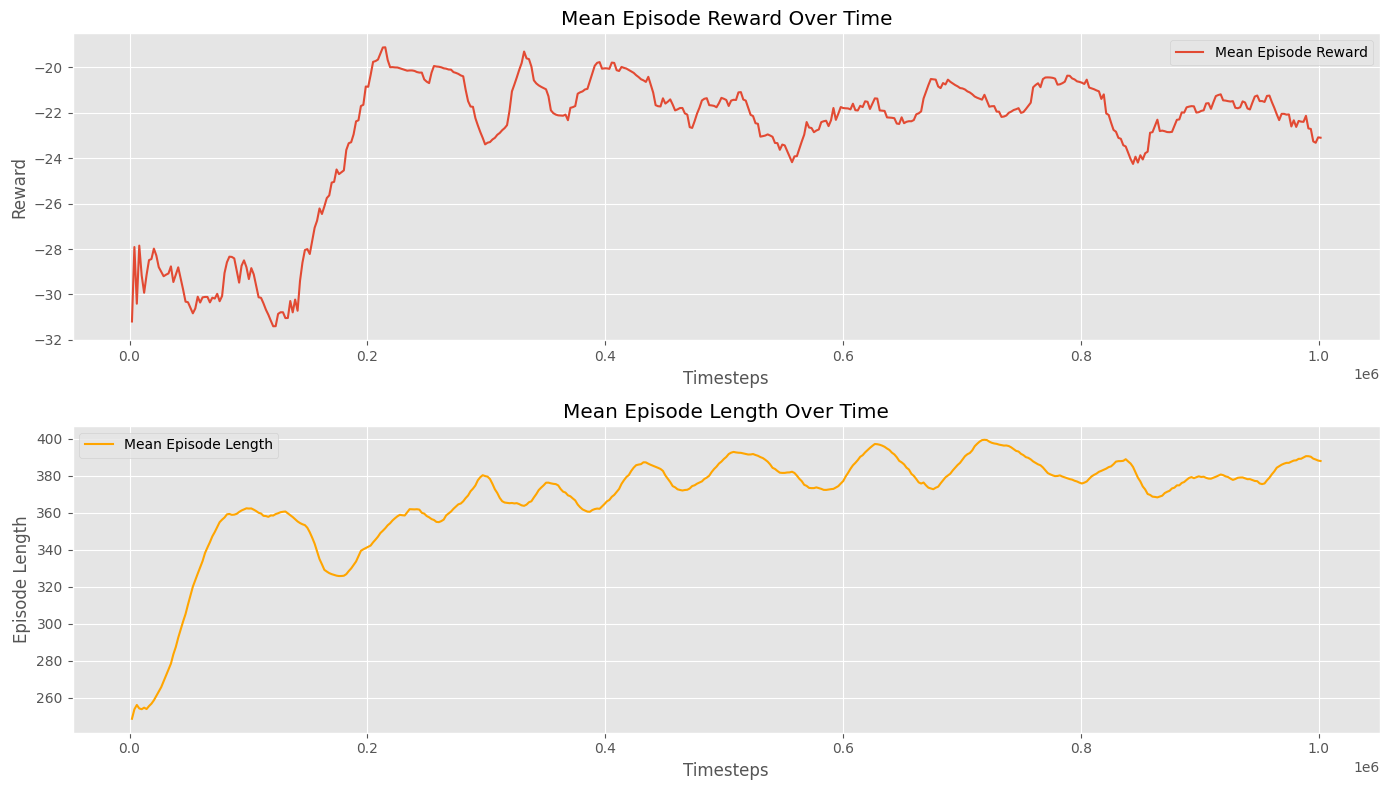

In [89]:
plt.style.use("ggplot")
plt.figure(figsize=(14, 8))

# Plot episode reward and episode length
plt.subplot(2, 1, 1)
plt.plot(df["time/total_timesteps"], df["rollout/ep_rew_mean"], label="Mean Episode Reward")
plt.xlabel("Timesteps")
plt.ylabel("Reward")
plt.title("Mean Episode Reward Over Time")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df["time/total_timesteps"], df["rollout/ep_len_mean"], label="Mean Episode Length", color="orange")
plt.xlabel("Timesteps")
plt.ylabel("Episode Length")
plt.title("Mean Episode Length Over Time")
plt.legend()

plt.tight_layout()
plt.show()


#### Value Function Loss Over Time
✅ Healthy Behavior:
- Value loss should decrease steadily and plateau at a low-ish level.
- Some fluctuation is normal, especially in more stochastic environments like ours.

⚠️ Warning Signs:
- Loss increasing or wildly oscillating, value function is unstable or diverging.
- Loss stuck high, value net can’t approximate expected returns, maybe due to bad rewards or sparse feedback.

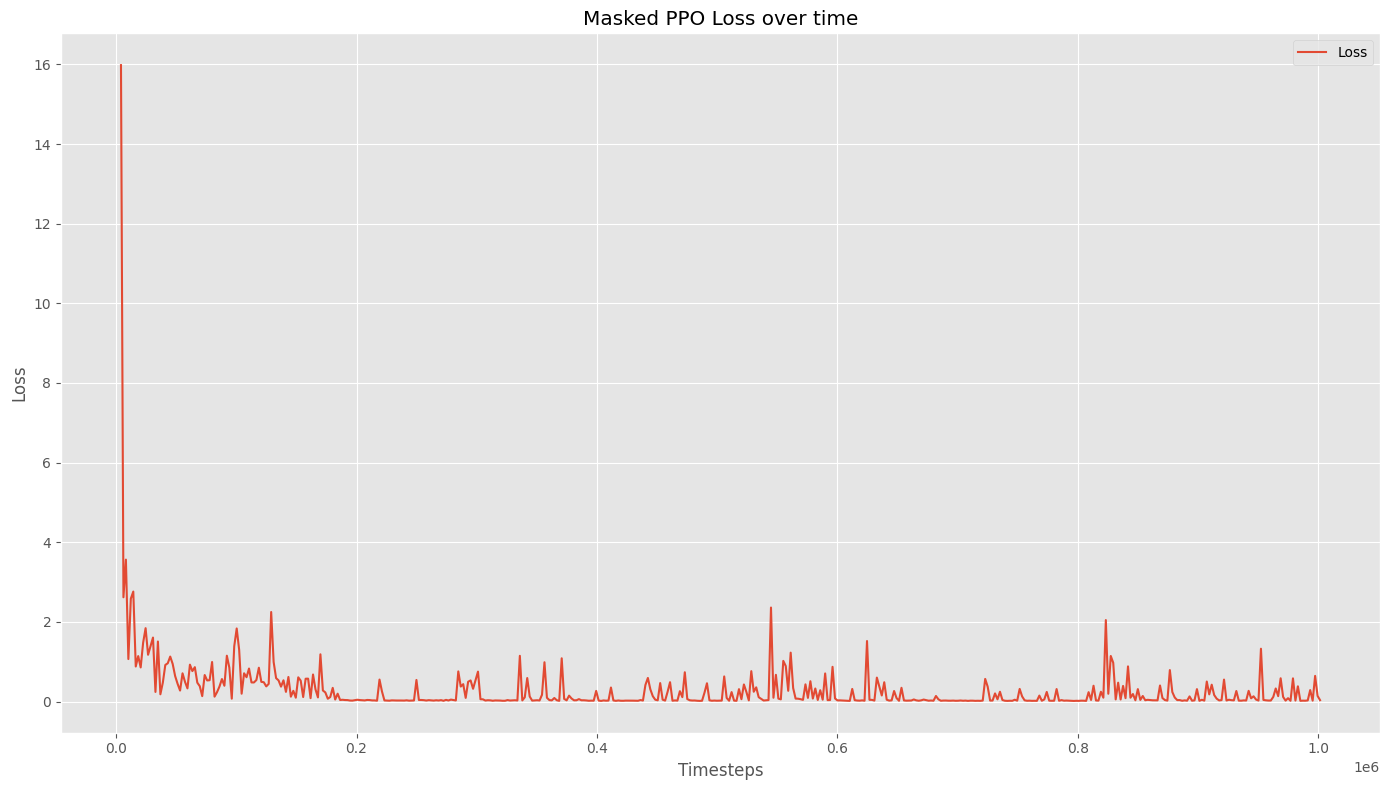

In [90]:
plt.figure(figsize=(14, 8))

# Value function loss
plt.plot(df["time/total_timesteps"], df["train/value_loss"], label="Loss")

plt.xlabel("Timesteps")
plt.ylabel("Loss")
plt.title("Masked PPO Loss over time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### Policy Gradient Loss & Approximate KL Divergence
✅ Healthy Behavior:
- Policy gradient loss doesn’t need to hit zero — some up-and-down is fine.
- Approx KL should stay small and stable (PPO wants small policy changes).
- A good KL range is ~0.01–0.03. Too high could mean policy is changing too much per update.

⚠️ Warning Signs:
- KL → 0 and policy loss → 0 = policy is frozen or collapsed (can’t/won’t explore anymore).
- KL spikes and loss spikes = unstable or overreactive updates, may need lower learning_rate or smaller clip_range.

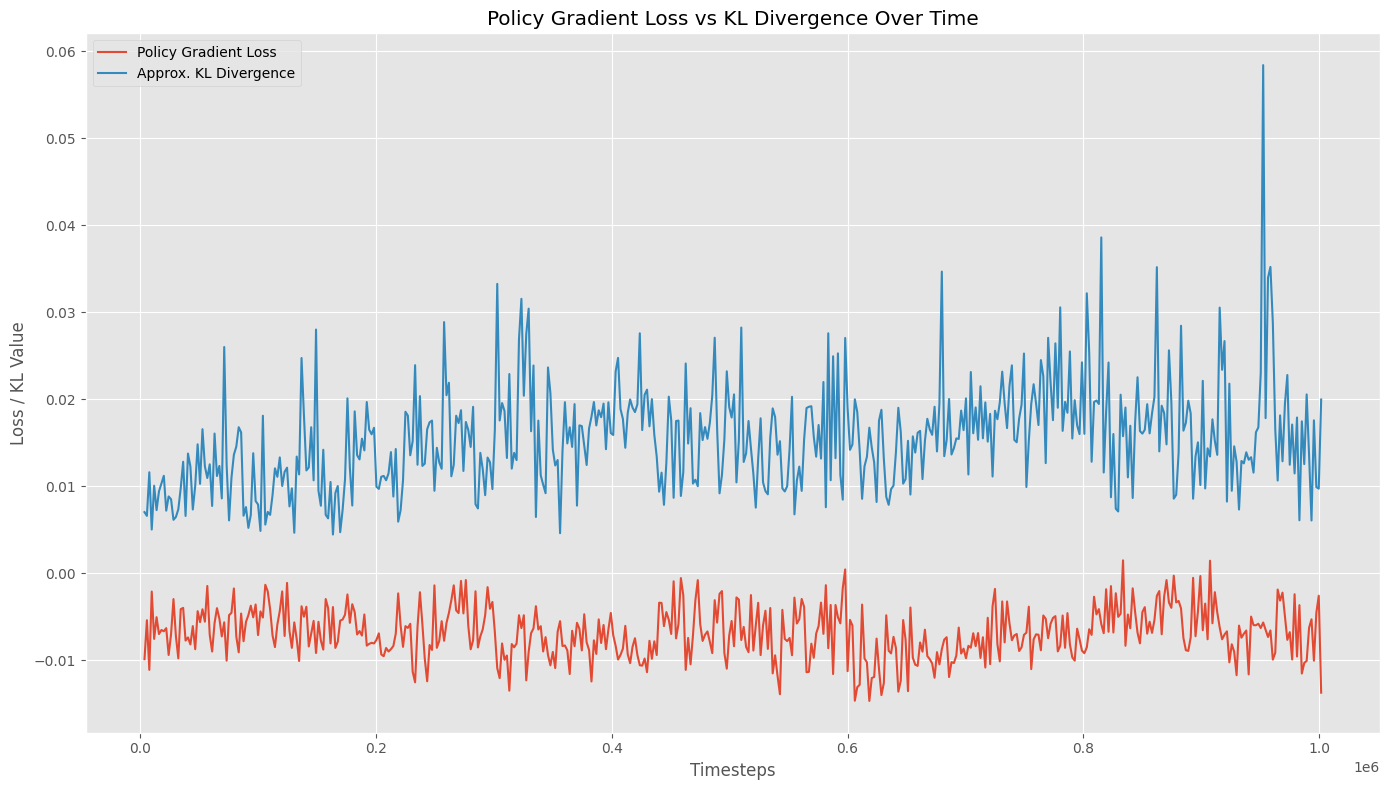

In [91]:
plt.figure(figsize=(14, 8))

# Policy gradient loss
plt.plot(df["time/total_timesteps"], df["train/policy_gradient_loss"], label="Policy Gradient Loss")
# Approximate KL divergence
plt.plot(df["time/total_timesteps"], df["train/approx_kl"], label="Approx. KL Divergence")

plt.xlabel("Timesteps")
plt.ylabel("Loss / KL Value")
plt.title("Policy Gradient Loss vs KL Divergence Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Entropy Loss Over Time
**Note** A value of -2 has more randomness than -0.1 because this is negative policy entropy

✅ Healthy Training Behavior
- Starts low (e.g., -2 to -4), agent is exploring actions randomly.
- Gradually increases toward 0 over time,  agent is becoming more confident, relying on learned policy.
- A smooth curve upward (entropy loss increasing slowly) is a sign of balanced learning 

⚠️ Warning Signs
- Sharp drop then flatlines to 0, policy collapsed too early
- Remains very low, still highly random
- Oscillations, unstable learning

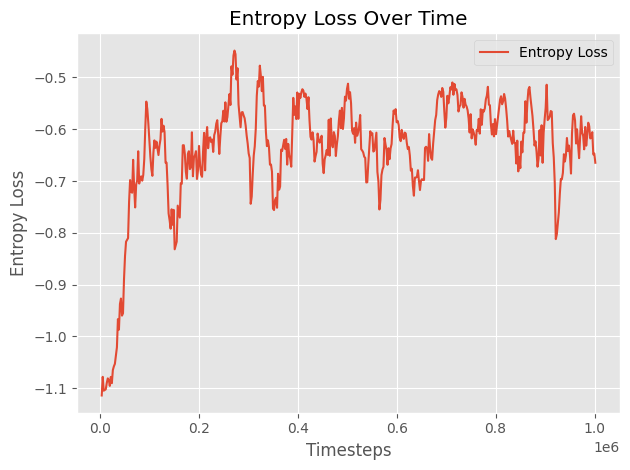

In [92]:
# Entropy Loss
plt.plot(df["time/total_timesteps"], df["train/entropy_loss"], label="Entropy Loss")

plt.xlabel("Timesteps")
plt.ylabel("Entropy Loss")
plt.title("Entropy Loss Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()